In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = 'input.csv'

#Xuất bảng

In [3]:
path = pd.read_csv(data)
df = pd.DataFrame(path)
df

,Name,Image,Price,PhanLoai,Quan jogger,Quan jean,Quan au,Ao thun nam,Ao khoac,Ao so mi,Ao hoodie
0,Quần jogger nam QGNTK208,https://360boutique.vn/wp-content/uploads/202...,450.000₫,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Giày nam GIATK230,https://360boutique.vn/wp-content/uploads/202...,550.000₫,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Giày nam GIATK229,https://360boutique.vn/wp-content/uploads/202...,790.000₫,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Giày nam GIATK228,https://360boutique.vn/wp-content/uploads/202...,750.000₫,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Áo khoác nam ABZTK203,https://360boutique.vn/wp-content/uploads/202...,1.250.000₫,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1139,Áo sơ mi tay dài trơn MODAL FITTED form - 10S2...,https://routine.vn/media/catalog/product/cache...,420.000₫,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1140,Áo sơ mi tay dài STRIPE REGULAR form - 10S20SH...,https://routine.vn/media/catalog/product/cache...,445.000₫,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1141,Quần JEAN đen COTTON SLIM FIT form - 10S20DPA055,https://routine.vn/media/catalog/product/cache...,450.000₫,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
moving_column = df.pop('PhanLoai')
df.insert(1,'PhanLoai', moving_column)
df.head()

,Name,PhanLoai,Image,Price,Quan jogger,Quan jean,Quan au,Ao thun nam,Ao khoac,Ao so mi,Ao hoodie
0,Quần jogger nam QGNTK208,1.0,https://360boutique.vn/wp-content/uploads/202...,450.000₫,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Giày nam GIATK230,2.0,https://360boutique.vn/wp-content/uploads/202...,550.000₫,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Giày nam GIATK229,2.0,https://360boutique.vn/wp-content/uploads/202...,790.000₫,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Giày nam GIATK228,2.0,https://360boutique.vn/wp-content/uploads/202...,750.000₫,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Áo khoác nam ABZTK203,0.0,https://360boutique.vn/wp-content/uploads/202...,1.250.000₫,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
#Tạo cột Giá thành để loại bỏ "đ" trong price
df['GiaThanh'] = ''
df['GiaThanh'] = df['Price'].str[:-1]
df.head()

,Name,PhanLoai,Image,Price,Quan jogger,Quan jean,Quan au,Ao thun nam,Ao khoac,Ao so mi,Ao hoodie,GiaThanh
0,Quần jogger nam QGNTK208,1.0,https://360boutique.vn/wp-content/uploads/202...,450.000₫,1.0,0.0,0.0,0.0,0.0,0.0,0.0,450.000
1,Giày nam GIATK230,2.0,https://360boutique.vn/wp-content/uploads/202...,550.000₫,0.0,0.0,0.0,0.0,0.0,0.0,0.0,550.000
2,Giày nam GIATK229,2.0,https://360boutique.vn/wp-content/uploads/202...,790.000₫,0.0,0.0,0.0,0.0,0.0,0.0,0.0,790.000
3,Giày nam GIATK228,2.0,https://360boutique.vn/wp-content/uploads/202...,750.000₫,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.000
4,Áo khoác nam ABZTK203,0.0,https://360boutique.vn/wp-content/uploads/202...,1.250.000₫,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.250.000


#Tính số sản phẩm là Áo, Quần, hay SP khác.
0 là áo, 1 là quần, 2 là sản phẩm còn lại.

In [6]:
count_ao = 0
for i in df['PhanLoai']:
  if i == 0:
    count_ao = count_ao+1

print('Tong ao trog file la: ',count_ao)

count_quan = 0
for i in df['PhanLoai']:
  if i == 1:
    count_quan = count_quan + 1

print('Tong quan trog file la: ',count_quan)

count_other = 0
for i in df['PhanLoai']:
  if i == 2:
    count_other = count_other + 1
  

print('Tong cac sp khac trog file la: ',count_other)

sum = count_ao + count_quan + count_other
print(sum)

#Tính % của Áo, Quần và các sản phẩm khác:

percent_ao = (count_ao*100)/sum
print(percent_ao)

percent_quan = (count_quan*100)/sum
print(percent_quan)

percent_other = (count_other*100)/sum
print(percent_other)

Tong ao trog file la:  638
Tong quan trog file la:  379
Tong cac sp khac trog file la:  125
1142
55.86690017513135
33.18739054290718
10.945709281961472


#Histogram về giá thành các sản phẩm

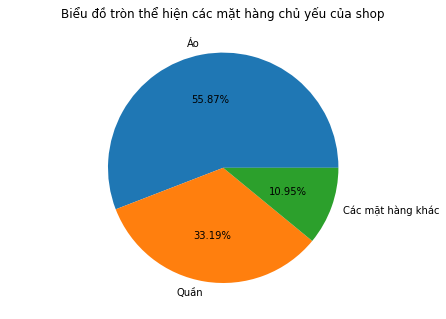

In [7]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
sanpham = ['Áo', 'Quần', 'Các mặt hàng khác']
students = [percent_ao, percent_quan, percent_other]
ax.pie(students, labels = sanpham,autopct='%0.2f%%')
ax.set_title("Biểu đồ tròn thể hiện các mặt hàng chủ yếu của shop")

plt.show()

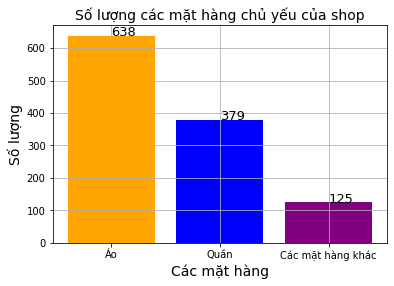

In [8]:
#Biểu đồ cột về số lượng các mặt hàng chủ yếu của shop:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],fontsize = 13)

sanpham = ['Áo', 'Quần', 'Các mặt hàng khác']

soluong = [count_ao, count_quan, count_other]

New_Colors = ['orange','blue','purple']
plt.bar(sanpham, soluong, color=New_Colors)
plt.title('Số lượng các mặt hàng chủ yếu của shop', fontsize=14)
plt.xlabel('Các mặt hàng', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)
plt.grid(True)
addlabels(sanpham,soluong)
plt.show()

In [10]:
print(df['GiaThanh'].dtype)

object


In [9]:
#Đưa giá trị từ object về int
for i in range(len(df['GiaThanh'])):
  df['GiaThanh'][i]=df['Price'].str[:-1][i].replace(" ","")

for i  in range(len(df['GiaThanh'])):
  df['GiaThanh'][i]=df['Price'].str[:-1][i].replace(".","")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


AttributeError: ignored

In [ ]:
df['GiaThanh'] = df['GiaThanh'].astype(int)
print(df['GiaThanh'].dtype)


int64


In [ ]:
df['GiaThanh']
df['GiaThanh'].min()

35000

In [ ]:
#Đếm số lượng sản phẩm trog các khoảng: 
count_1 = 0 #Giá thành: 0 - 200k
count_2 = 0 #Giá thành: 200k - 400k
count_3 = 0 #Giá thành: 400k - 600k
count_4 = 0 #Giá thành: 600k - 800k
count_5 = 0 #Giá thành: 800k - 1000k
count_6 = 0 #Giá thành: 1000k trở lên
for i in df['GiaThanh']:
  if i < 200000:
    count_1 = count_1 + 1  
  if i >= 200000 and i < 400000:
    count_2 = count_2 + 1
  if i >= 400000 and i < 600000:
    count_3 = count_3 + 1
  if i >= 600000 and i < 800000:
    count_4 = count_4 + 1
  if i >=800000 and i < 1000000:
    count_5 = count_5 + 1
  if i >= 1000000:
    count_6 = count_6 + 1
  

print(count_1)
print(count_2)
print(count_3)
print(count_4)
print(count_5)
print(count_6)
sum = count_1 + count_2 + count_3 + count_4 + count_5 + count_6
print(sum)

136
631
285
53
20
17
1142


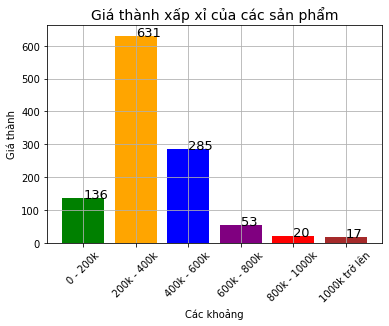

In [ ]:
#Biểu đồ cột thể hiện xấp xỉ giá thành của các sản phẩm:

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],fontsize = 13)

giathanh = ['0 - 200k', '200k - 400k', '400k - 600k', '600k - 800k', '800k - 1000k',
            '1000k trở lên']

khoang = [count_1, count_2, count_3, count_4, count_5, count_6]

New_Colors = ['green','orange','blue','purple', 'red', 'brown']
plt.bar(giathanh, khoang, color=New_Colors)
plt.title('Giá thành xấp xỉ của các sản phẩm', fontsize=14)
plt.xlabel('Các khoảng', fontsize=10)
plt.ylabel('Giá thành', fontsize=10)
plt.grid(True)
plt.xticks(rotation = 45)
addlabels(giathanh,khoang)
plt.show()
